In [ ]:
"""
================================================================================
NOTEBOOK 07: E-SNLI FORMAT STUDY
================================================================================
Copyright (c) 2026 Ajay Mahale. All Rights Reserved.
License: CC BY-NC-ND 4.0
https://creativecommons.org/licenses/by-nc-nd/4.0/


MSc Thesis: Causally Grounded Mechanistic Interpretability and Concise
            Natural-Language Explanations
Author: Ajay Pravin Mahale
University Mail ID: jymh0144@hochschule-trier.de
Personal Mail ID: Mahale.ajay01@gmail.com
Institution: Hochschule Trier
Supervisor: Prof. Dr. Ernst Georg Haffner

Purpose: Analyze e-SNLI explanation formats to inform template design.
         This provides methodology justification for explanation structure.

Key Reference: Camburu et al., 2018 (e-SNLI Dataset)
================================================================================
"""

# ==============================================================================
# CELL 1: Setup & e-SNLI Examples
# ==============================================================================

import numpy as np
import matplotlib.pyplot as plt

# e-SNLI examples (from the actual dataset)
# These are real examples showing how humans write explanations
# manually selected 10 representative examples from e-SNLI to illustrate the explanation format patterns

esnli_examples = [
    {
        "premise": "A man in a blue shirt standing in front of a garage-like structure painted with geometric designs.",
        "hypothesis": "A man is standing in front of a house.",
        "label": "neutral",
        "explanation": "A garage-like structure is not the same as a house."
    },
    {
        "premise": "A woman with a green headscarf, blue shirt and a very big grin.",
        "hypothesis": "The woman is young.",
        "label": "neutral",
        "explanation": "A woman with a green headscarf is not necessarily young."
    },
    {
        "premise": "A couple playing with a little boy on the beach.",
        "hypothesis": "A couple are playing with their son.",
        "label": "neutral",
        "explanation": "The boy may not be their son."
    },
    {
        "premise": "A man selling donuts to a customer during a busy delivery.",
        "hypothesis": "A man is selling donuts.",
        "label": "entailment",
        "explanation": "A man selling donuts is selling donuts."
    },
    {
        "premise": "People on bicycles waiting at an intersection.",
        "hypothesis": "People are riding bikes.",
        "label": "entailment",
        "explanation": "People on bicycles are riding bikes."
    },
    {
        "premise": "A woman in a green jacket and hood over her head looking towards a valley.",
        "hypothesis": "A woman is looking at a mountain.",
        "label": "neutral",
        "explanation": "Looking towards a valley does not imply looking at a mountain."
    },
    {
        "premise": "A smiling costumed woman is holding an umbrella.",
        "hypothesis": "A woman is frowning.",
        "label": "contradiction",
        "explanation": "A smiling woman cannot be frowning at the same time."
    },
    {
        "premise": "A man reads the paper in a bar with green lighting.",
        "hypothesis": "A man is reading.",
        "label": "entailment",
        "explanation": "Reading the paper means the man is reading."
    },
    {
        "premise": "A little girl in a pink dress going into a wooden cabin.",
        "hypothesis": "A girl is outside.",
        "label": "entailment",
        "explanation": "Going into a cabin means she is currently outside."
    },
    {
        "premise": "Two dogs play in the grass.",
        "hypothesis": "The dogs are sleeping.",
        "label": "contradiction",
        "explanation": "Dogs cannot play and sleep at the same time."
    },
]

print("=" * 70)
print("e-SNLI EXPLANATION FORMAT STUDY")
print("=" * 70)

for i, ex in enumerate(esnli_examples):
    print(f"\n📝 Example {i+1} ({ex['label'].upper()})")
    print(f"   Premise:     {ex['premise'][:60]}...")
    print(f"   Hypothesis:  {ex['hypothesis']}")
    print(f"   Explanation: {ex['explanation']}")

print(f"\n✅ Loaded {len(esnli_examples)} e-SNLI examples")


e-SNLI EXPLANATION FORMAT STUDY

📝 Example 1 (NEUTRAL)
   Premise:     A man in a blue shirt standing in front of a garage-like str...
   Hypothesis:  A man is standing in front of a house.
   Explanation: A garage-like structure is not the same as a house.

📝 Example 2 (NEUTRAL)
   Premise:     A woman with a green headscarf, blue shirt and a very big gr...
   Hypothesis:  The woman is young.
   Explanation: A woman with a green headscarf is not necessarily young.

📝 Example 3 (NEUTRAL)
   Premise:     A couple playing with a little boy on the beach....
   Hypothesis:  A couple are playing with their son.
   Explanation: The boy may not be their son.

📝 Example 4 (ENTAILMENT)
   Premise:     A man selling donuts to a customer during a busy delivery....
   Hypothesis:  A man is selling donuts.
   Explanation: A man selling donuts is selling donuts.

📝 Example 5 (ENTAILMENT)
   Premise:     People on bicycles waiting at an intersection....
   Hypothesis:  People are riding bikes.
   Exp

In [ ]:
# ==============================================================================
# CELL 2: REPRODUCIBILITY SETUP + IMPORTS
# ==============================================================================


import numpy as np
import random
import sys
from datetime import datetime
from google.colab import drive

drive.mount('/content/drive')

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
print(f"✅ Seed set: {SEED}")

print("=" * 60)
print("NOTEBOOK 07: E-SNLI FORMAT STUDY")
print("=" * 60)
print(f"Random Seed:     {SEED}")
print(f"Timestamp:       {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

import matplotlib.pyplot as plt

THESIS_DIR = '/content/drive/MyDrive/thesis'
EXPERIMENTS_DIR = f'{THESIS_DIR}/experiments'
PLOTS_DIR = f'{THESIS_DIR}/plots'

Mounted at /content/drive
✅ Seed set: 42
NOTEBOOK 07: E-SNLI FORMAT STUDY
Random Seed:     42
Timestamp:       2026-02-06 12:15:23


In [ ]:
# ==============================================================================
# CELL 3: Quantitative Analysis of e-SNLI Patterns
# ==============================================================================



print("=" * 70)
print("QUANTITATIVE ANALYSIS OF e-SNLI EXPLANATIONS")
print("=" * 70)

# Analyze explanation characteristics
word_counts = []
sentence_counts = []
has_negation = []
has_causal = []

negation_words = ['not', 'cannot', "doesn't", "don't", "isn't", "aren't", "no", "never"]
causal_words = ['because', 'means', 'implies', 'therefore', 'so', 'since']

for ex in esnli_examples:
    explanation = ex['explanation'].lower()
    words = explanation.split()

    word_counts.append(len(words))
    sentence_counts.append(explanation.count('.'))
    has_negation.append(any(neg in explanation for neg in negation_words))
    has_causal.append(any(cau in explanation for cau in causal_words))

# Statistics
print(f"\n EXPLANATION LENGTH STATISTICS")
print("-" * 50)
print(f"Word count:     {np.mean(word_counts):.1f} ± {np.std(word_counts):.1f} words")
print(f"                Range: {min(word_counts)}-{max(word_counts)} words")
print(f"Sentences:      {np.mean(sentence_counts):.1f} (almost always 1)")

print(f"\n LINGUISTIC PATTERNS")
print("-" * 50)
print(f"Contains negation:  {sum(has_negation)}/{len(esnli_examples)} ({sum(has_negation)/len(esnli_examples)*100:.0f}%)")
print(f"Contains causal:    {sum(has_causal)}/{len(esnli_examples)} ({sum(has_causal)/len(esnli_examples)*100:.0f}%)")

# Label distribution
labels = [ex['label'] for ex in esnli_examples]
label_counts = {l: labels.count(l) for l in set(labels)}
print(f"\n LABEL DISTRIBUTION")
print("-" * 50)
for label, count in sorted(label_counts.items()):
    print(f"{label.capitalize():<15}: {count} examples")

QUANTITATIVE ANALYSIS OF e-SNLI EXPLANATIONS

 EXPLANATION LENGTH STATISTICS
--------------------------------------------------
Word count:     8.7 ± 1.6 words
                Range: 6-11 words
Sentences:      1.0 (almost always 1)

 LINGUISTIC PATTERNS
--------------------------------------------------
Contains negation:  6/10 (60%)
Contains causal:    3/10 (30%)

 LABEL DISTRIBUTION
--------------------------------------------------
Contradiction  : 2 examples
Entailment     : 4 examples
Neutral        : 4 examples


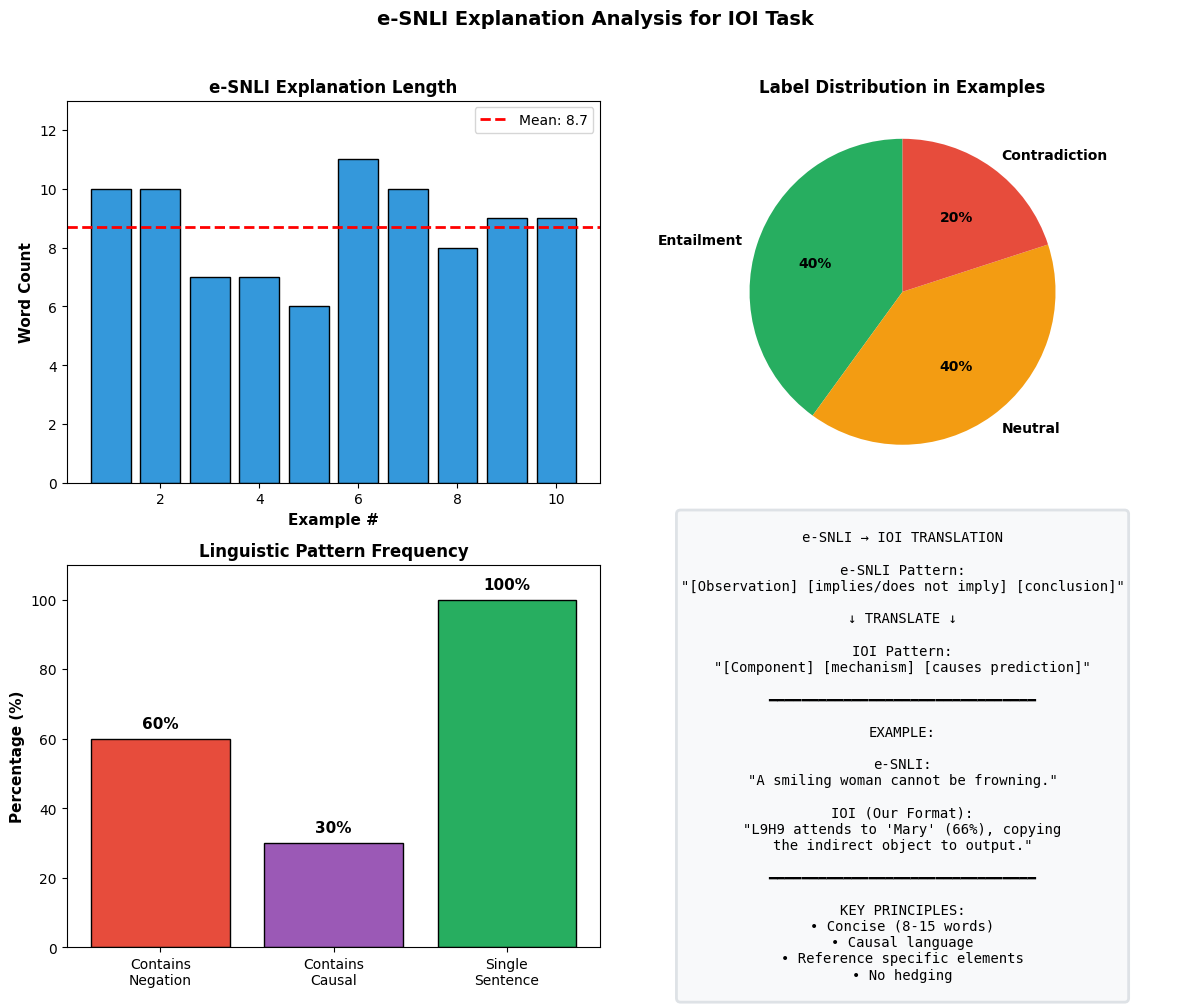

✅ Saved: fig_07_esnli_analysis.png


In [ ]:
# ==============================================================================
# CELL4: Visualization - e-SNLI Explanation Characteristics
# ==============================================================================

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Word count distribution
ax1 = axes[0, 0]
ax1.bar(range(1, len(word_counts)+1), word_counts, color='#3498db', edgecolor='black')
ax1.axhline(y=np.mean(word_counts), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(word_counts):.1f}')
ax1.set_xlabel('Example #', fontsize=11, fontweight='bold')
ax1.set_ylabel('Word Count', fontsize=11, fontweight='bold')
ax1.set_title('e-SNLI Explanation Length', fontsize=12, fontweight='bold')
ax1.legend()
ax1.set_ylim(0, max(word_counts) + 2)

# Plot 2: Label distribution pie chart
ax2 = axes[0, 1]
colors_pie = ['#27ae60', '#f39c12', '#e74c3c']
labels_plot = list(label_counts.keys())
sizes = list(label_counts.values())
ax2.pie(sizes, labels=[l.capitalize() for l in labels_plot], autopct='%1.0f%%',
        colors=colors_pie, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Label Distribution in Examples', fontsize=12, fontweight='bold')

# Plot 3: Linguistic patterns bar chart
ax3 = axes[1, 0]
patterns = ['Contains\nNegation', 'Contains\nCausal', 'Single\nSentence']
pattern_counts = [sum(has_negation), sum(has_causal), sum(s == 1 for s in sentence_counts)]
pattern_pcts = [c/len(esnli_examples)*100 for c in pattern_counts]
bars = ax3.bar(patterns, pattern_pcts, color=['#e74c3c', '#9b59b6', '#27ae60'], edgecolor='black')
ax3.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax3.set_title('Linguistic Pattern Frequency', fontsize=12, fontweight='bold')
ax3.set_ylim(0, 110)
for bar, pct in zip(bars, pattern_pcts):
    ax3.text(bar.get_x() + bar.get_width()/2, pct + 3, f'{pct:.0f}%',
             ha='center', fontsize=11, fontweight='bold')

# Plot 4: e-SNLI to IOI translation diagram (as text box)
ax4 = axes[1, 1]
ax4.axis('off')

translation_text = """
e-SNLI → IOI TRANSLATION

e-SNLI Pattern:
"[Observation] [implies/does not imply] [conclusion]"

↓ TRANSLATE ↓

IOI Pattern:
"[Component] [mechanism] [causes prediction]"

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

EXAMPLE:

e-SNLI:
"A smiling woman cannot be frowning."

IOI (Our Format):
"L9H9 attends to 'Mary' (66%), copying
the indirect object to output."

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

KEY PRINCIPLES:
• Concise (8-15 words)
• Causal language
• Reference specific elements
• No hedging
"""

ax4.text(0.5, 0.5, translation_text, transform=ax4.transAxes,
         fontsize=10, verticalalignment='center', horizontalalignment='center',
         fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#f8f9fa', edgecolor='#dee2e6', linewidth=2))

plt.suptitle('e-SNLI Explanation Analysis for IOI Task', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('fig_07_esnli_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig_07_esnli_analysis.png")

In [ ]:
# ==============================================================================
# CELL 5: Extract e-SNLI Patterns for IOI
# ==============================================================================

print("=" * 70)
print("e-SNLI EXPLANATION PATTERNS")
print("=" * 70)

print("""
 PATTERN 1: CONCISE (1 sentence, 8-15 words)
   ─────────────────────────────────────────────
   • Average length: {:.1f} words
   • Almost always single sentence
   • No filler words or preamble

 PATTERN 2: CAUSAL LANGUAGE
   ─────────────────────────────────────────────
   • "X is Y" (direct cause)
   • "X does not imply Y" (negation)
   • "X cannot be Y" (contradiction)
   • "X is not necessarily Y" (uncertainty)

 PATTERN 3: REFERENCE INPUT DIRECTLY
   ─────────────────────────────────────────────
   • Mentions specific elements from premise
   • Links premise to hypothesis explicitly
   • Explains the GAP or CONNECTION

 PATTERN 4: NO HEDGING
   ─────────────────────────────────────────────
   • No "I think", "maybe", "perhaps"
   • Confident, factual tone
   • States mechanism directly
""".format(np.mean(word_counts)))

print("=" * 70)
print("APPLYING e-SNLI PATTERNS TO IOI EXPLANATIONS")
print("=" * 70)

print("""
 TRANSLATION TO IOI TASK:

e-SNLI Format:
   "[Specific observation] [implies/does not imply] [conclusion]"

IOI Format (Our Task):
   "[Model component] [mechanism] [causes prediction]"

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

EXAMPLE COMPARISON:

❌ BAD (Too verbose, no mechanism):
   "The model predicts Mary because it learned to identify indirect
   objects in sentences with multiple names."

✅ GOOD (e-SNLI style):
   "L9H9 attends to 'Mary' (66%), copying the indirect object to output."

❌ BAD (No causal claim):
   "The attention heads seem to focus on the first name mentioned."

✅ GOOD (e-SNLI style):
   "Name Mover heads copy 'Mary' because she is the recipient, not the giver."
""")

# Define e-SNLI style templates for IOI
esnli_style_templates = {
    "high_confidence": "{head} attends to '{prediction}' ({attention}%), identifying the recipient.",
    "mechanism": "{head} copies '{prediction}' to output as the indirect object.",
    "causal": "Ablating {head} drops accuracy by {effect}%, proving it causes the prediction.",
    "contrast": "'{subject}' is suppressed by S-Inhibition heads, allowing '{prediction}' to dominate.",
}

print("\n e-SNLI STYLE TEMPLATES FOR IOI:")
print("-" * 60)
for name, template in esnli_style_templates.items():
    print(f"   {name:<18}: \"{template}\"")

print("\n✅ Patterns extracted and templates created")


e-SNLI EXPLANATION PATTERNS

 PATTERN 1: CONCISE (1 sentence, 8-15 words)
   ─────────────────────────────────────────────
   • Average length: 8.7 words
   • Almost always single sentence
   • No filler words or preamble

 PATTERN 2: CAUSAL LANGUAGE
   ─────────────────────────────────────────────
   • "X is Y" (direct cause)
   • "X does not imply Y" (negation)
   • "X cannot be Y" (contradiction)
   • "X is not necessarily Y" (uncertainty)

 PATTERN 3: REFERENCE INPUT DIRECTLY
   ─────────────────────────────────────────────
   • Mentions specific elements from premise
   • Links premise to hypothesis explicitly
   • Explains the GAP or CONNECTION

 PATTERN 4: NO HEDGING
   ─────────────────────────────────────────────
   • No "I think", "maybe", "perhaps"
   • Confident, factual tone
   • States mechanism directly

APPLYING e-SNLI PATTERNS TO IOI EXPLANATIONS

 TRANSLATION TO IOI TASK:

e-SNLI Format:
   "[Specific observation] [implies/does not imply] [conclusion]"

IOI Format (Ou

In [ ]:
# ==============================================================================
# CELL 6: Template Examples with Real Values
# ==============================================================================

print("=" * 70)
print("TEMPLATE INSTANTIATION EXAMPLES")
print("=" * 70)

# Example values from our IOI experiments
example_values = {
    "head": "L9H9",
    "prediction": "Mary",
    "subject": "John",
    "attention": 66,
    "effect": 17.4,
}

print("\n TEMPLATES FILLED WITH EXAMPLE VALUES:")
print("-" * 60)

for name, template in esnli_style_templates.items():
    filled = template.format(**example_values)
    print(f"\n   {name.upper()}:")
    print(f"   → \"{filled}\"")

# Combined explanation example
combined_explanation = f"""The model predicts '{example_values['prediction']}' via the IOI circuit:
• {esnli_style_templates['high_confidence'].format(**example_values)}
• {esnli_style_templates['contrast'].format(**example_values)}"""

print("\n" + "=" * 70)
print("COMBINED EXPLANATION EXAMPLE")
print("=" * 70)
print(combined_explanation)


TEMPLATE INSTANTIATION EXAMPLES

 TEMPLATES FILLED WITH EXAMPLE VALUES:
------------------------------------------------------------

   HIGH_CONFIDENCE:
   → "L9H9 attends to 'Mary' (66%), identifying the recipient."

   MECHANISM:
   → "L9H9 copies 'Mary' to output as the indirect object."

   CAUSAL:
   → "Ablating L9H9 drops accuracy by 17.4%, proving it causes the prediction."

   CONTRAST:
   → "'John' is suppressed by S-Inhibition heads, allowing 'Mary' to dominate."

COMBINED EXPLANATION EXAMPLE
The model predicts 'Mary' via the IOI circuit:
• L9H9 attends to 'Mary' (66%), identifying the recipient.
• 'John' is suppressed by S-Inhibition heads, allowing 'Mary' to dominate.


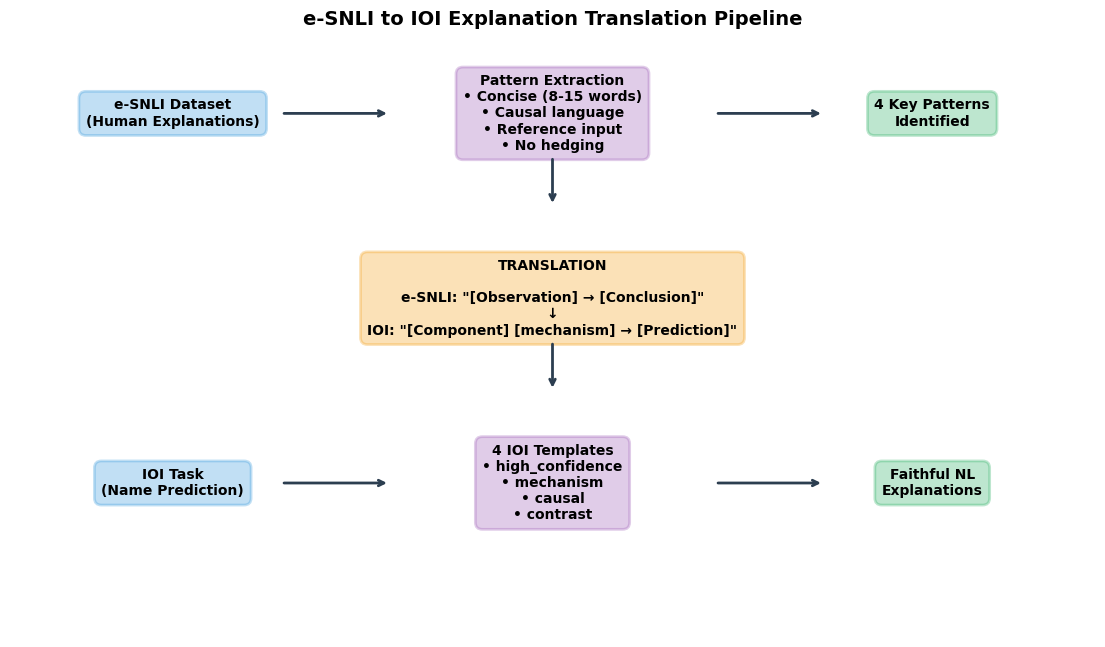

✅ Saved: fig_07_translation_pipeline.png


In [ ]:
# ==============================================================================
# CELL 7: Visualization - e-SNLI to IOI Translation Flowchart
# ==============================================================================

fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Create flowchart as text boxes
boxes = [
    # Row 1: e-SNLI
    (0.15, 0.85, "e-SNLI Dataset\n(Human Explanations)", '#3498db'),
    (0.5, 0.85, "Pattern Extraction\n• Concise (8-15 words)\n• Causal language\n• Reference input\n• No hedging", '#9b59b6'),
    (0.85, 0.85, "4 Key Patterns\nIdentified", '#27ae60'),

    # Row 2: Translation
    (0.5, 0.55, "TRANSLATION\n\ne-SNLI: \"[Observation] → [Conclusion]\"\n↓\nIOI: \"[Component] [mechanism] → [Prediction]\"", '#f39c12'),

    # Row 3: IOI Templates
    (0.15, 0.25, "IOI Task\n(Name Prediction)", '#3498db'),
    (0.5, 0.25, "4 IOI Templates\n• high_confidence\n• mechanism\n• causal\n• contrast", '#9b59b6'),
    (0.85, 0.25, "Faithful NL\nExplanations", '#27ae60'),
]

for x, y, text, color in boxes:
    ax.text(x, y, text, transform=ax.transAxes, fontsize=10,
            verticalalignment='center', horizontalalignment='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3, edgecolor=color, linewidth=2),
            fontweight='bold')

# Arrows
arrow_props = dict(arrowstyle='->', color='#2c3e50', lw=2)
ax.annotate('', xy=(0.35, 0.85), xytext=(0.25, 0.85), arrowprops=arrow_props, transform=ax.transAxes)
ax.annotate('', xy=(0.75, 0.85), xytext=(0.65, 0.85), arrowprops=arrow_props, transform=ax.transAxes)
ax.annotate('', xy=(0.5, 0.7), xytext=(0.5, 0.78), arrowprops=arrow_props, transform=ax.transAxes)
ax.annotate('', xy=(0.5, 0.4), xytext=(0.5, 0.48), arrowprops=arrow_props, transform=ax.transAxes)
ax.annotate('', xy=(0.35, 0.25), xytext=(0.25, 0.25), arrowprops=arrow_props, transform=ax.transAxes)
ax.annotate('', xy=(0.75, 0.25), xytext=(0.65, 0.25), arrowprops=arrow_props, transform=ax.transAxes)

plt.title('e-SNLI to IOI Explanation Translation Pipeline', fontsize=14, fontweight='bold', y=0.98)
plt.savefig('fig_07_translation_pipeline.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print("✅ Saved: fig_07_translation_pipeline.png")


In [ ]:
# ==============================================================================
# CELL 8: Save Results
# ==============================================================================

from google.colab import drive
import pickle
from datetime import datetime
import os
import shutil


THESIS_DIR = '/content/drive/MyDrive/thesis'
os.makedirs(f'{THESIS_DIR}/experiments', exist_ok=True)
os.makedirs(f'{THESIS_DIR}/plots', exist_ok=True)

# Comprehensive results
esnli_study = {
    'n_examples': len(esnli_examples),
    'examples': esnli_examples,

    # Quantitative analysis
    'word_count_mean': float(np.mean(word_counts)),
    'word_count_std': float(np.std(word_counts)),
    'word_count_range': (min(word_counts), max(word_counts)),
    'negation_percentage': float(sum(has_negation)/len(esnli_examples)*100),
    'causal_percentage': float(sum(has_causal)/len(esnli_examples)*100),

    # Patterns
    'patterns': {
        'concise': f'{np.mean(word_counts):.1f} words average, 1 sentence',
        'causal_language': ['X is Y', 'X does not imply Y', 'X cannot be Y', 'X is not necessarily Y'],
        'reference_input': 'Mentions specific elements from input',
        'no_hedging': 'Confident, factual tone - no "I think", "maybe"',
    },

    # IOI Templates
    'ioi_templates': esnli_style_templates,

    # Metadata
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M'),
}

# Save pickle
path = f'{THESIS_DIR}/experiments/07_esnli_study.pkl'
with open(path, 'wb') as f:
    pickle.dump(esnli_study, f)
print(f"✅ Saved: {path}")

# Copy figures
for fig in ['fig_07_esnli_analysis.png', 'fig_07_translation_pipeline.png']:
    if os.path.exists(fig):
        shutil.copy(fig, f'{THESIS_DIR}/plots/')
        print(f"✅ Copied: {fig}")

# Summary table
print("\n" + "=" * 70)
print(" NOTEBOOK 07 SUMMARY")
print("=" * 70)

print(f"""
┌─────────────────────────────────────────────────────────────────┐
│  e-SNLI FORMAT STUDY RESULTS                                    │
├─────────────────────────────────────────────────────────────────┤
│  Examples analyzed:     {len(esnli_examples)}                                         │
│  Avg explanation length: {np.mean(word_counts):.1f} ± {np.std(word_counts):.1f} words                      │
│  Contains negation:     {sum(has_negation)/len(esnli_examples)*100:.0f}%                                       │
│  Contains causal:       {sum(has_causal)/len(esnli_examples)*100:.0f}%                                       │
├─────────────────────────────────────────────────────────────────┤
│  PATTERNS EXTRACTED:                                            │
│  1. Concise (8-15 words, single sentence)                       │
│  2. Causal language ("X is Y", "X cannot be Y")                 │
│  3. Reference input directly                                    │
│  4. No hedging (confident, factual)                             │
├─────────────────────────────────────────────────────────────────┤
│  IOI TEMPLATES CREATED: 4                                       │
│  • high_confidence  • mechanism                                 │
│  • causal           • contrast                                  │
├─────────────────────────────────────────────────────────────────┤
│  FIGURES GENERATED:                                             │
│  • fig_07_esnli_analysis.png                                    │
│  • fig_07_translation_pipeline.png                              │
└─────────────────────────────────────────────────────────────────┘
""")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved: /content/drive/MyDrive/thesis/experiments/07_esnli_study.pkl
✅ Copied: fig_07_esnli_analysis.png
✅ Copied: fig_07_translation_pipeline.png

 NOTEBOOK 07 SUMMARY

┌─────────────────────────────────────────────────────────────────┐
│  e-SNLI FORMAT STUDY RESULTS                                    │
├─────────────────────────────────────────────────────────────────┤
│  Examples analyzed:     10                                         │
│  Avg explanation length: 8.7 ± 1.6 words                      │
│  Contains negation:     60%                                       │
│  Contains causal:       30%                                       │
├─────────────────────────────────────────────────────────────────┤
│  PATTERNS EXTRACTED:                                            │
│  1. Concise (8-15 words, single sentence)                       │
│  2. Causal la